# Assignment 16-07-20

# CSE-221710304051-Sanjana

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("/all_stocks_5yr.csv")
#df.sort_values('date',ascending=True,inplace=True)
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
df.shape

(619040, 7)

In [7]:
df.Name.value_counts()

APD     1259
WYN     1259
KMX     1259
TXN     1259
NKE     1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [8]:
df_gpc=df[df.Name=='GPC']
df_gpc.head()

,date,open,high,low,close,volume,Name
252542,2013-02-08,69.57,69.99,69.57,69.92,533092,GPC
252543,2013-02-11,69.92,70.11,69.47,69.89,417443,GPC
252544,2013-02-12,69.87,70.23,69.84,70.19,659367,GPC
252545,2013-02-13,70.20,70.62,69.89,70.54,600947,GPC
252546,2013-02-14,70.55,70.87,70.36,70.79,581533,GPC


In [9]:
df_gpc.shape

(1259, 7)

In [10]:
df_gpc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 252542 to 253800
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [11]:
x = []
y = []
for i  in range(df_gpc.shape[0]-7-1):
    x.append(df_gpc['high'][i:i+7])
    y.append(df_gpc['high'][252542+i+7])
print(x[:2])

[252542    69.99
252543    70.11
252544    70.23
252545    70.62
252546    70.87
252547    71.44
252548    70.91
Name: high, dtype: float64, 252543    70.11
252544    70.23
252545    70.62
252546    70.87
252547    71.44
252548    70.91
252549    69.64
Name: high, dtype: float64]


In [12]:
x=np.array(x)

In [13]:
df1=pd.DataFrame(x,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,69.99,70.11,70.23,70.62,70.87,71.44,70.91
1,70.11,70.23,70.62,70.87,71.44,70.91,69.64
2,70.23,70.62,70.87,71.44,70.91,69.64,68.98
3,70.62,70.87,71.44,70.91,69.64,68.98,69.58
4,70.87,71.44,70.91,69.64,68.98,69.58,69.93


In [14]:
df1['d8']=y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,69.99,70.11,70.23,70.62,70.87,71.44,70.91,69.64
1,70.11,70.23,70.62,70.87,71.44,70.91,69.64,68.98
2,70.23,70.62,70.87,71.44,70.91,69.64,68.98,69.58
3,70.62,70.87,71.44,70.91,69.64,68.98,69.58,69.93
4,70.87,71.44,70.91,69.64,68.98,69.58,69.93,69.42


In [15]:
df1.shape

(1251, 8)

In [16]:
x_train=df1.iloc[:1000,:7]
x_test=df1.iloc[1000:,:7]
y_train=df1['d8'][:1000]
y_test=df1['d8'][1000:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 7)
(251, 7)
(1000,)
(251,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_sc=pd.DataFrame(sc.transform(x_train),columns=x_train.columns)
x_test_sc=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)
x_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.788880e-16,3.895773e-16,2.224887e-16,1.613154e-15,-1.114664e-15,1.216582e-15,-7.787104e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.525342e+00,-2.534887e+00,-2.544360e+00,-2.553732e+00,-2.562999e+00,-2.572049e+00,-2.580626e+00
25%,-7.462226e-01,-7.504773e-01,-7.528770e-01,-7.562034e-01,-7.609524e-01,-7.659756e-01,-7.699067e-01
50%,-1.314048e-01,-1.344606e-01,-1.375483e-01,-1.394377e-01,-1.405654e-01,-1.429550e-01,-1.440447e-01
75%,9.108578e-01,9.119030e-01,9.119479e-01,9.120439e-01,9.124433e-01,9.119390e-01,9.117654e-01
max,2.407993e+00,2.410548e+00,2.412954e+00,2.415158e+00,2.417519e+00,2.419599e+00,2.421271e+00


In [18]:
import tensorflow.keras as keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model=Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss='mse')

In [21]:
x_train_sc = x_train_sc.values.reshape(1000,7,1)
x_test_sc = x_test_sc.values.reshape(251,7,1)

In [22]:
history = model.fit(x_train_sc,y_train,epochs=100,validation_data=(x_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 7223.6904 - val_loss: 4943.7342
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 3546.4514 - val_loss: 3096.4798
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 2396.0499 - val_loss: 2166.1805
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1656.6870 - val_loss: 1519.3923
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1137.0259 - val_loss: 1053.4349
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 771.1295 - val_loss: 721.9581
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 517.9517 - val_loss: 491.8235
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 346.6075 - val_loss: 334.0680
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 235.1837 -

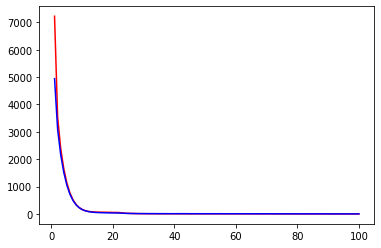

In [23]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [24]:
model.predict(x_test_sc)

array([[ 97.86093 ],
       [ 98.168106],
       [ 98.6463  ],
       [ 99.01273 ],
       [ 99.31677 ],
       [ 99.53558 ],
       [ 99.78735 ],
       [100.02435 ],
       [100.19124 ],
       [100.384155],
       [ 99.804   ],
       [ 98.82328 ],
       [ 97.81355 ],
       [ 97.162674],
       [ 96.72571 ],
       [ 96.96019 ],
       [ 97.23444 ],
       [ 97.18164 ],
       [ 96.707756],
       [ 96.168945],
       [ 95.602905],
       [ 95.131775],
       [ 94.949844],
       [ 94.93455 ],
       [ 94.962296],
       [ 95.13639 ],
       [ 95.40123 ],
       [ 95.72542 ],
       [ 95.9572  ],
       [ 96.00909 ],
       [ 95.7107  ],
       [ 95.46054 ],
       [ 95.210915],
       [ 94.767525],
       [ 94.51589 ],
       [ 94.34395 ],
       [ 94.34893 ],
       [ 94.29447 ],
       [ 94.03952 ],
       [ 93.24852 ],
       [ 92.62925 ],
       [ 91.92241 ],
       [ 91.46997 ],
       [ 91.4398  ],
       [ 91.42877 ],
       [ 91.30377 ],
       [ 91.083435],
       [ 90.9

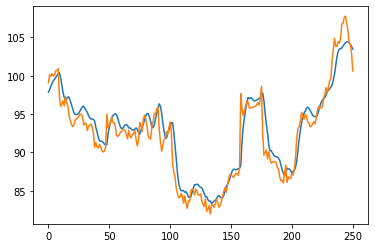

In [25]:
plt.plot(range(len(x_test_sc)),model.predict(x_test_sc).flat)
plt.plot(range(len(x_test_sc)),y_test)

In [26]:
x_test_sc[0].reshape(1,7,1)

array([[[0.94229206],
        [0.98079554],
        [1.0330317 ],
        [0.93268549],
        [0.98758045],
        [1.02388317],
        [1.01519041]]])

In [27]:
model.predict(x_test_sc[0].reshape(1,7,1))

array([[97.86093]], dtype=float32)

In [28]:
y_test[1000]

99.07